In [2]:
# Requirements:
# pip install pandas numpy matplotlib statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# 1) Build the dataset (from your conversation)
# ---------------------------
rows = [
("Uzbekistan","NMMK JSC",2024,0.46,0.10,0.18,111025000.00,41825000.00,0.04,1.01,0.87,0.88,50912500,111025000,11025000,60112500,41825000,96262500,9650000,14762500,14675000,"uzb",0.064465573,13.5,11.9,6.29,0.57,9.63,26.948,38.986,114.97),
("Uzbekistan","NMMK JSC",2023,0.45,0.17,0.31,107125000.00,71350000.00,-0.05,1.09,0.91,0.81,48175000,107125000,18475000,58950000,71350000,97112500,15000000,10012500,9225000,"uzb",0.041656037,14.0,2.15,6.00,0.65,9.96,24.7,41.34,101.59),
("Uzbekistan","NMMK JSC",2022,0.45,0.11,0.20,113125000.00,63687500.00,0.00,1.07,0.90,1.38,51062500,113125000,12600000,62062500,63687500,101662500,17362500,11462500,10675000,"uzb",0.01600318,17.0,2.48,8.03,0.64,11.45,21.92,35.62,90.1),
("Kazakhstan","KazMunayGas",2024,0.37,0.06,0.09,18934647.00,9237960.00,0.12,0.61,0.79,0.28,7010363,18934647,1094247,11924284,9237960,14928977,302822,4005670,6544487,"kaz",0.226104908,14.25,2.6,5.1,0.49,8.4,81.61,59.78,288.0),
("Kazakhstan","KazMunayGas",2023,0.39,0.05,0.09,16942712.00,9242568.00,0.02,2.24,0.80,0.22,6548315,16942712,924461,10394397,9242568,13505675,202293,3437857,1534218,"kaz",0.063469364,16.5,6.1,3.2,0.57,13.1,90.36,60.655,262.64),
("Kazakhstan","KazMunayGas",2022,0.41,0.08,0.13,16656890.00,9827313.00,0.00,1.95,0.81,0.23,6789464,16656890,1306560,9867426,9827313,13519627,301502,3137263,1606195,"kaz",0.067856842,16.75,28.0,4.3,0.64,16.1,93.74,50.934,225.5),
("Georgia","Georgia Capital",2024,0.00,0.10,0.10,3611317.00,368098.00,0.07,2.13,1.00,0.34,2304,3611317,363274,3609013,368098,3606400,125109,4917,2304,"gru",0.063858781,8.0,1.33,7.83,0.69,1.11,6.56,16.87,33.78),
("Georgia","Georgia Capital",2023,0.00,0.18,0.18,3380223.00,616010.00,0.20,9.83,1.00,0.08,1711,3380223,608617,3378512,616010,3363411,47659,16812,1711,"gru",0.065279164,9.5,1.9,10.96,0.70,2.49,6.09,15.44,30.78),
("Georgia","Georgia Capital",2022,0.00,0.00,0.00,2818784.00,925.00,0.00,17.03,0.99,0.00,1393,2818784,-12153,2817391,925,2795060,0,23724,1393,"gru",0.115218297,11.0,2.1,10.64,0.77,11.9,5.58,13.54,24.99),
("Azerbaijan","SOCAR JSC",2024,0.49,0.02,0.04,94701.00,84689.00,0.32,1.30,0.70,0.72,46044,94701,2048,48657,84689,66250,1473,28451,21849,"aze",0.0,7.25,7.0,1.12,0.64,2.21,26.55,21.05,74.32),
("Azerbaijan","SOCAR JSC",2023,0.52,0.03,0.06,71966.00,85201.00,0.04,1.17,0.68,0.75,37118,71966,1970,34848,85201,49033,1473,22933,19571,"aze",0.0,9.0,6.65,4.71,0.84,8.79,35.49,25.02,72.36),
("Azerbaijan","SOCAR JSC",2022,0.67,0.02,0.06,69357.00,77531.00,0.00,1.03,0.65,0.45,46607,69357,1459,22750,77531,45417,656,23940,23308,"aze",0.0,7.75,6.7,5.62,0.95,13.85,47.27,21.27,72.0),
("Kyrgyzstan","Kumtor Gold Co.",2024,0.08,0.21,0.23,1902511.00,989128.00,0.18,8.11,0.60,0.27,150089,1902511,397403,1752422,989128,1132365,109224,707146,87206,"kyr",0.0466299,9.0,0.87,6.15,0.90,5.0,3.8,11.91,17.48),
("Kyrgyzstan","Kumtor Gold Co.",2023,0.07,0.19,0.20,1615500.00,848975.00,0.11,12.56,0.62,0.36,109183,1615500,302535,1506317,848975,1006218,109224,609282,48512,"kyr",0.018520999,10.0,0.65,8.97,1.12,10.8,3.3,12.3,13.99),
("Kyrgyzstan","Kumtor Gold Co.",2022,0.09,0.26,0.28,1452358.00,986511.00,0.00,8.56,0.57,1.02,134476,1452358,371721,1317882,986511,834044,380000,618314,72271,"kyr",0.084081994,13.0,0.55,5.51,1.06,13.9,2.25,10.61,12.13),
]

cols = ["Country","Name","Year","leverage","roa","roe","size_in_asset","size_in_sales","growth_of_assets","liquidity","tangibility","divident_payout",
"Total_Debt","Total_Assets","Net_Income","Equity","Sales","Fixed_Assets","Dividends","Current_Assets","Current_Liability",
"country_code","exvol","int_rate","fdi","gdpg","open","inf","export_b","import_b","gdp_b"]

df = pd.DataFrame(rows, columns=cols)
df = df.set_index(["Name","Year"]).sort_index()

In [5]:
# add log size variables
df["ln_size_asset"] = np.log(df["size_in_asset"].replace(0, np.nan).astype(float))
df["ln_size_sales"] = np.log(df["size_in_sales"].replace(0, np.nan).astype(float))

Correlation matrix:
                   leverage    roa    roe  size_in_asset  size_in_sales  \
leverage             1.000 -0.509 -0.190          0.376          0.378   
roa                 -0.509  1.000  0.904          0.105          0.143   
roe                 -0.190  0.904  1.000          0.469          0.523   
size_in_asset        0.376  0.105  0.469          1.000          0.968   
size_in_sales        0.378  0.143  0.523          0.968          1.000   
growth_of_assets    -0.200  0.022 -0.194         -0.404         -0.437   
liquidity           -0.785  0.300  0.029         -0.401         -0.397   
tangibility         -0.211 -0.240 -0.145          0.376          0.359   
divident_payout      0.438  0.202  0.429          0.630          0.625   
exvol               -0.297 -0.019 -0.088         -0.065         -0.099   
int_rate             0.217  0.073  0.304          0.570          0.577   
fdi                  0.439 -0.332 -0.205          0.074          0.017   
gdpg             

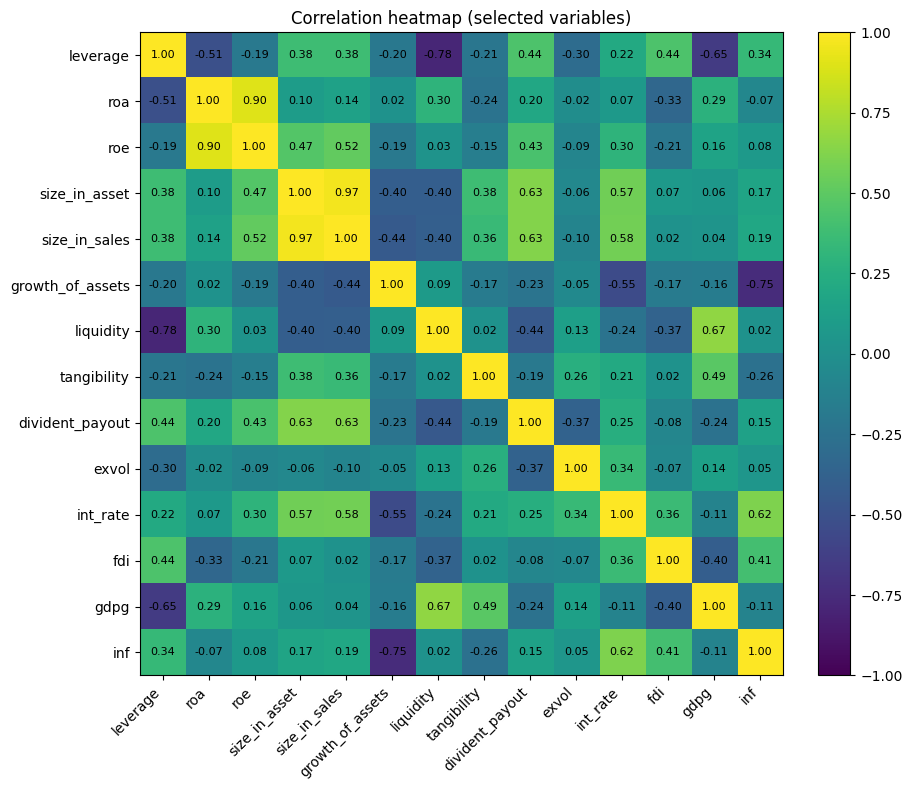

In [6]:
# ---------------------------
# Correlation matrix and heatmap (selected vars)
# ---------------------------
selected = ["leverage","roa","roe","size_in_asset","size_in_sales","growth_of_assets","liquidity","tangibility","divident_payout","exvol","int_rate","fdi","gdpg","inf"]
corr = df[selected].astype(float).corr()
print("Correlation matrix:\n", corr.round(3))

plt.figure(figsize=(10,8))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(corr.index)), corr.index)
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha='center', va='center', fontsize=8)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Correlation heatmap (selected variables)")
plt.tight_layout()
plt.show()

In [7]:
# ---------------------------
# VIF for independent variables (example for the leverage model)
# ---------------------------
X = df[["roa","size_in_asset","size_in_sales","growth_of_assets","liquidity","tangibility","divident_payout","exvol","fdi","gdpg"]].astype(float).dropna()
X_const = sm.add_constant(X)
vif = pd.DataFrame({
    "variable": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
}).sort_values("VIF", ascending=False)
print("\nVIF table:\n", vif)


VIF table:
             variable        VIF
0              const  95.891003
2      size_in_asset  23.022777
3      size_in_sales  22.747665
10              gdpg   5.098526
7    divident_payout   3.490339
6        tangibility   3.422471
5          liquidity   3.309456
9                fdi   1.916433
1                roa   1.871596
4   growth_of_assets   1.693821
8              exvol   1.487633


In [10]:
# ---------------------------
# Pooled OLS (robust), clustered by company
# ---------------------------
y = "leverage"
X_vars = ["roa","ln_size_asset","liquidity","tangibility","growth_of_assets","exvol","fdi","gdpg"]
reg_df = df[[y]+X_vars].dropna().astype(float).reset_index()

# Pooled robust OLS
X_pooled = sm.add_constant(reg_df[X_vars])
pooled_ols = sm.OLS(reg_df[y], X_pooled).fit(cov_type='HC1')
print("\nPooled OLS (robust SE):\n", pooled_ols.summary())


Pooled OLS (robust SE):
                             OLS Regression Results                            
Dep. Variable:               leverage   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     29.44
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           0.000290
Time:                        11:39:16   Log-Likelihood:                 16.375
No. Observations:                  15   AIC:                            -14.75
Df Residuals:                       6   BIC:                            -8.377
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const         

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [11]:
# Pooled clustered by company
pooled_clustered = pooled_ols.get_robustcov_results(cov_type='cluster', groups=reg_df["Name"])
print("\nPooled OLS (clustered by company):\n", pooled_clustered.summary())


Pooled OLS (clustered by company):
                             OLS Regression Results                            
Dep. Variable:               leverage   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     23.40
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00490
Time:                        11:39:53   Log-Likelihood:                 16.375
No. Observations:                  15   AIC:                            -14.75
Df Residuals:                       6   BIC:                            -8.377
Df Model:                           8                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
con

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '


In [12]:
# ---------------------------
# Fixed Effects via within (demean-by-company)
# ---------------------------
def within_demean(df_in, group_col, cols):
    return df_in.groupby(group_col)[cols].transform(lambda x: x - x.mean())

w_df = reg_df.copy()
to_demean = [y] + X_vars
w_df[to_demean] = within_demean(w_df, "Name", to_demean)
w_df = w_df.dropna()

X_within = w_df[X_vars]
y_within = w_df[y]
fe_ols = sm.OLS(y_within, X_within).fit(cov_type='cluster', cov_kwds={'groups': w_df["Name"]})
print("\nFixed Effects (within) OLS (clustered SE by company):\n", fe_ols.summary())


Fixed Effects (within) OLS (clustered SE by company):
                                  OLS Regression Results                                
Dep. Variable:               leverage   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.558
Method:                 Least Squares   F-statistic:                              2.607
Date:                Wed, 26 Nov 2025   Prob (F-statistic):                       0.188
Time:                        11:40:15   Log-Likelihood:                          40.330
No. Observations:                  15   AIC:                                     -64.66
Df Residuals:                       7   BIC:                                     -58.99
Df Model:                           8                                                  
Covariance Type:              cluster                                                  
                       coef    std err          z      P>|z|    

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '


In [13]:
# ---------------------------
# Random intercept via MixedLM (approx RE)
# ---------------------------
try:
    from statsmodels.regression.mixed_linear_model import MixedLM
    X_re = sm.add_constant(reg_df[X_vars])
    md = MixedLM(reg_df[y], X_re, groups=reg_df["Name"])
    mdf = md.fit(reml=False)
    print("\nRandom-intercept MixedLM summary:\n", mdf.summary())
except Exception as e:
    print("MixedLM could not be fit:", e)




Random-intercept MixedLM summary:
            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  leverage
No. Observations:    15       Method:              ML      
No. Groups:          5        Scale:               0.0006  
Min. group size:     3        Log-Likelihood:      20.3112 
Max. group size:     3        Converged:           Yes     
Mean group size:     3.0                                   
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
const             0.731    0.633  1.154 0.248 -0.510  1.973
roa              -0.038    0.208 -0.185 0.853 -0.445  0.368
ln_size_asset     0.031    0.047  0.664 0.507 -0.061  0.124
liquidity        -0.003    0.003 -0.836 0.403 -0.009  0.004
tangibility      -1.179    0.554 -2.127 0.033 -2.266 -0.092
growth_of_assets -0.131    0.092 -1.422 0.155 -0.313  0.050
exvol          

In [14]:
# ---------------------------
# Fixed effects for alternative dependent variables (examples)
# ---------------------------
dependent_vars = ["roa","divident_payout","liquidity","tangibility"]
for dep in dependent_vars:
    tmp = df[[dep] + X_vars].dropna().reset_index()
    if tmp.shape[0] < 6:
        print(f"\nNot enough observations for {dep} model: {tmp.shape[0]} obs.")
        continue
    demeaned = tmp.groupby("Name")[[dep]+X_vars].transform(lambda x: x - x.mean())
    ytmp = demeaned[dep]
    Xtmp = demeaned[X_vars].dropna()
    ytmp = ytmp.loc[Xtmp.index]
    mod = sm.OLS(ytmp, Xtmp).fit(cov_type='cluster', cov_kwds={'groups': tmp.loc[Xtmp.index, group_col].astype('category').cat.codes.to_numpy()})
    print(f"\nFixed effects (within) for dependent = {dep}:\n", mod.summary())

NameError: name 'group_col' is not defined

In [18]:
# ...existing code...
import traceback

group_col = "Name"
dependent_vars = ["roa", "divident_payout", "liquidity", "tangibility"]

for dep in dependent_vars:
    try:
        if "X_vars" not in globals():
            raise NameError("X_vars is not defined. Define X_vars before running this cell.")

        # exclude dep from regressors if present
        Xvars_loop = [v for v in X_vars if v != dep]
        if not Xvars_loop:
            print(f"\nNo regressors left for {dep}; skipping.")
            continue

        tmp = df[[dep] + Xvars_loop].dropna().reset_index()
        if group_col not in tmp.columns:
            raise KeyError(f"Group column '{group_col}' not found in tmp columns: {tmp.columns.tolist()}")

        if tmp.shape[0] < 6:
            print(f"\nNot enough observations for {dep} model: {tmp.shape[0]} obs.")
            continue

        # within transform (demean by group)
        demeaned = tmp.groupby(group_col)[[dep] + Xvars_loop].transform(lambda x: x - x.mean())

        # align and drop NA
        Xtmp_df = demeaned[Xvars_loop].dropna()
        if Xtmp_df.empty:
            print(f"\nNo usable rows after demeaning for {dep}.")
            continue
        ytmp_ser = demeaned.loc[Xtmp_df.index, dep]

        # final alignment check
        groups = tmp.loc[Xtmp_df.index, group_col].astype("category").cat.codes.values  # 1D int codes
        if len(ytmp_ser) != len(Xtmp_df) or len(groups) != len(Xtmp_df):
            raise ValueError("Length mismatch between y, X, and groups after alignment.")

        # convert to numpy arrays (ensure shapes: y = (n,), X = (n,k))
        y = pd.to_numeric(ytmp_ser).values.ravel()
        X = Xtmp_df.astype(float).values

        # Fit OLS then get clustered robust cov
        base = sm.OLS(y, X).fit()
        clustered = base.get_robustcov_results(cov_type="cluster", groups=groups)

        print(f"\nFixed effects (within) for dependent = {dep}:\n", clustered.summary())

    except Exception as e:
        print(f"\nError running FE model for {dep}: {e}")
        traceback.print_exc()
# ...existing code...


Fixed effects (within) for dependent = roa:
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              17.59
Date:                Wed, 26 Nov 2025   Prob (F-statistic):                     0.00837
Time:                        11:49:10   Log-Likelihood:                          37.839
No. Observations:                  15   AIC:                                     -61.68
Df Residuals:                       8   BIC:                                     -56.72
Df Model:                           7                                                  
Covariance Type:              cluster                                                  
                 coef    std err          t      P>|t|      [0.025      0.

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. Th

# leverage

In [22]:
# ...existing code...
# Regression: leverage on exvol, int_rate, fdi, gdpg, open, inf
import statsmodels.api as sm

y_col = "leverage"
X_cols = ["exvol", "int_rate", "fdi", "gdpg", "open", "inf"]
group_col = "Name"

# prepare dataframe
reg_df = df[[y_col] + X_cols].dropna().reset_index()  # brings Name back as column
if reg_df.empty:
    print("No observations after dropping NA.")
else:
    # Pooled OLS (robust HC1)
    X_pooled = sm.add_constant(reg_df[X_cols])
    pooled = sm.OLS(reg_df[y_col], X_pooled).fit(cov_type="HC1")
    print("\nPooled OLS (HC1 robust):\n", pooled.summary())

    # Pooled OLS clustered by company
    clustered_pooled = pooled.get_robustcov_results(cov_type="cluster", groups=reg_df[group_col])
    print("\nPooled OLS (clustered by company):\n", clustered_pooled.summary())

    # Fixed effects (within) by demeaning at company level
    demean_cols = [y_col] + X_cols
    tmp = reg_df.copy()
    demeaned = tmp.groupby(group_col)[demean_cols].transform(lambda x: x - x.mean())
    X_fe = demeaned[X_cols].dropna()
    if X_fe.empty:
        print("\nNo usable rows after demeaning for FE model.")
    else:
        y_fe = demeaned.loc[X_fe.index, y_col]
        groups_fe = tmp.loc[X_fe.index, group_col]  # series of group labels
        # no constant for within estimator
        fe_base = sm.OLS(y_fe, X_fe).fit()
        fe_clustered = fe_base.get_robustcov_results(cov_type="cluster", groups=groups_fe)
        print("\nFixed Effects (within) OLS (clustered by company):\n", fe_clustered.summary())
# ...existing code...


Pooled OLS (HC1 robust):
                             OLS Regression Results                            
Dep. Variable:               leverage   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     9.964
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00239
Time:                        12:07:07   Log-Likelihood:                 13.097
No. Observations:                  15   AIC:                            -12.19
Df Residuals:                       8   BIC:                            -7.237
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5132    

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with few

# liquidity

In [23]:
# ...existing code...
import traceback

# MODEL 2: liquidity = α + β1*exvol + β2*int_rate + β3*fdi + β4*gdpg + β5*open + β6*inf + ε
y_col = "liquidity"
X_cols = ["exvol", "int_rate", "fdi", "gdpg", "open", "inf"]
group_col = "Name"

try:
    reg_df = df[[y_col] + X_cols].dropna().reset_index()
    if reg_df.empty:
        print("No observations after dropping NA for MODEL 2.")
    else:
        # Pooled OLS with HC1 robust SE
        X_pooled = sm.add_constant(reg_df[X_cols])
        pooled = sm.OLS(reg_df[y_col], X_pooled).fit(cov_type="HC1")
        print("\nPooled OLS (HC1 robust) - MODEL 2:\n", pooled.summary())

        # Pooled OLS clustered by company
        pooled_clustered = pooled.get_robustcov_results(cov_type="cluster", groups=reg_df[group_col])
        print("\nPooled OLS (clustered by company) - MODEL 2:\n", pooled_clustered.summary())

        # Fixed effects (within) by demeaning at company level
        demean_cols = [y_col] + X_cols
        tmp = reg_df.copy()
        demeaned = tmp.groupby(group_col)[demean_cols].transform(lambda x: x - x.mean())

        X_fe = demeaned[X_cols].dropna()
        if X_fe.empty:
            print("\nNo usable rows after demeaning for FE model (MODEL 2).")
        else:
            y_fe = demeaned.loc[X_fe.index, y_col]
            groups_fe = tmp.loc[X_fe.index, group_col]  # series of labels

            # ensure shapes
            y_fe = pd.to_numeric(y_fe).values.ravel()
            X_fe_vals = X_fe.astype(float).values

            fe_base = sm.OLS(y_fe, X_fe_vals).fit()
            fe_clustered = fe_base.get_robustcov_results(cov_type="cluster", groups=groups_fe)
            print("\nFixed Effects (within) OLS (clustered by company) - MODEL 2:\n", fe_clustered.summary())

except Exception as e:
    print("Error running MODEL 2:", e)
    traceback.print_exc()
# ...existing code...


Pooled OLS (HC1 robust) - MODEL 2:
                             OLS Regression Results                            
Dep. Variable:              liquidity   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     9.692
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00262
Time:                        12:07:42   Log-Likelihood:                -37.607
No. Observations:                  15   AIC:                             89.21
Df Residuals:                       8   BIC:                             94.17
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -1

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with few

# tangibilty

In [24]:
# ...existing code...
import traceback

# MODEL 3: tangibility = α + β1*exvol + β2*int_rate + β3*fdi + β4*gdpg + β5*open + β6*inf + ε
y_col = "tangibility"
X_cols = ["exvol", "int_rate", "fdi", "gdpg", "open", "inf"]
group_col = "Name"

try:
    reg_df = df[[y_col] + X_cols].dropna().reset_index()
    if reg_df.empty:
        print("No observations after dropping NA for MODEL 3.")
    else:
        # Pooled OLS (HC1 robust)
        X_pooled = sm.add_constant(reg_df[X_cols])
        pooled = sm.OLS(reg_df[y_col], X_pooled).fit(cov_type="HC1")
        print("\nPooled OLS (HC1 robust) - MODEL 3 (tangibility):\n", pooled.summary())

        # Pooled OLS clustered by company
        pooled_clustered = pooled.get_robustcov_results(cov_type="cluster", groups=reg_df[group_col])
        print("\nPooled OLS (clustered by company) - MODEL 3:\n", pooled_clustered.summary())

        # Fixed effects (within) by demeaning at company level
        demean_cols = [y_col] + X_cols
        tmp = reg_df.copy()
        demeaned = tmp.groupby(group_col)[demean_cols].transform(lambda x: x - x.mean())

        X_fe = demeaned[X_cols].dropna()
        if X_fe.empty:
            print("\nNo usable rows after demeaning for FE model (MODEL 3).")
        else:
            y_fe = demeaned.loc[X_fe.index, y_col]
            groups_fe = tmp.loc[X_fe.index, group_col]  # series of group labels

            # ensure shapes
            y_fe = pd.to_numeric(y_fe).values.ravel()
            X_fe_vals = X_fe.astype(float).values

            fe_base = sm.OLS(y_fe, X_fe_vals).fit()
            fe_clustered = fe_base.get_robustcov_results(cov_type="cluster", groups=groups_fe)
            print("\nFixed Effects (within) OLS (clustered by company) - MODEL 3:\n", fe_clustered.summary())

except Exception as e:
    print("Error running MODEL 3:", e)
    traceback.print_exc()
# ...existing code...


Pooled OLS (HC1 robust) - MODEL 3 (tangibility):
                             OLS Regression Results                            
Dep. Variable:            tangibility   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     15.99
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           0.000464
Time:                        12:08:19   Log-Likelihood:                 23.959
No. Observations:                  15   AIC:                            -33.92
Df Residuals:                       8   BIC:                            -28.96
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with few

In [25]:
# ...existing code...
import traceback

# MODEL 4: roa = α + β1*leverage + β2*liquidity + β3*tangibility + β4*size + β5*growth + ε
y_col = "roa"
# use ln_size_asset for size and growth_of_assets for growth
X_cols = ["leverage", "liquidity", "tangibility", "ln_size_asset", "growth_of_assets"]
group_col = "Name"

try:
    reg_df = df[[y_col] + X_cols].dropna().reset_index()
    if reg_df.empty:
        print("No observations after dropping NA for MODEL 4.")
    else:
        # Pooled OLS (HC1 robust)
        X_pooled = sm.add_constant(reg_df[X_cols])
        pooled = sm.OLS(reg_df[y_col], X_pooled).fit(cov_type="HC1")
        print("\nPooled OLS (HC1 robust) - MODEL 4 (ROA):\n", pooled.summary())

        # Pooled OLS clustered by company
        pooled_clustered = pooled.get_robustcov_results(cov_type="cluster", groups=reg_df[group_col])
        print("\nPooled OLS (clustered by company) - MODEL 4:\n", pooled_clustered.summary())

        # Fixed effects (within) by demeaning at company level
        demean_cols = [y_col] + X_cols
        tmp = reg_df.copy()
        demeaned = tmp.groupby(group_col)[demean_cols].transform(lambda x: x - x.mean())

        X_fe = demeaned[X_cols].dropna()
        if X_fe.empty:
            print("\nNo usable rows after demeaning for FE model (MODEL 4).")
        else:
            y_fe = demeaned.loc[X_fe.index, y_col]
            groups_fe = tmp.loc[X_fe.index, group_col]  # labels for clustering

            # ensure shapes
            y_fe = pd.to_numeric(y_fe).values.ravel()
            X_fe_vals = X_fe.astype(float).values

            fe_base = sm.OLS(y_fe, X_fe_vals).fit()
            fe_clustered = fe_base.get_robustcov_results(cov_type="cluster", groups=groups_fe)
            print("\nFixed Effects (within) OLS (clustered by company) - MODEL 4:\n", fe_clustered.summary())

except Exception as e:
    print("Error running MODEL 4:", e)
    traceback.print_exc()
# ...existing code...


Pooled OLS (HC1 robust) - MODEL 4 (ROA):
                             OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     15.44
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           0.000348
Time:                        12:11:01   Log-Likelihood:                 25.116
No. Observations:                  15   AIC:                            -38.23
Df Residuals:                       9   BIC:                            -33.98
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with few

In [26]:
# ...existing code...
import traceback

# MODEL 4 (alternate): roe = α + β1*leverage + β2*liquidity + β3*tangibility + β4*size + β5*growth + ε
y_col = "roe"
# use ln_size_asset for size and growth_of_assets for growth
X_cols = ["leverage", "liquidity", "tangibility", "ln_size_asset", "growth_of_assets"]
group_col = "Name"

try:
    reg_df = df[[y_col] + X_cols].dropna().reset_index()
    if reg_df.empty:
        print("No observations after dropping NA for ROE model.")
    else:
        # Pooled OLS (HC1 robust)
        X_pooled = sm.add_constant(reg_df[X_cols])
        pooled = sm.OLS(reg_df[y_col], X_pooled).fit(cov_type="HC1")
        print("\nPooled OLS (HC1 robust) - ROE model:\n", pooled.summary())

        # Pooled OLS clustered by company
        pooled_clustered = pooled.get_robustcov_results(cov_type="cluster", groups=reg_df[group_col])
        print("\nPooled OLS (clustered by company) - ROE model:\n", pooled_clustered.summary())

        # Fixed effects (within) by demeaning at company level
        demean_cols = [y_col] + X_cols
        tmp = reg_df.copy()
        demeaned = tmp.groupby(group_col)[demean_cols].transform(lambda x: x - x.mean())

        X_fe = demeaned[X_cols].dropna()
        if X_fe.empty:
            print("\nNo usable rows after demeaning for FE ROE model.")
        else:
            y_fe = demeaned.loc[X_fe.index, y_col]
            groups_fe = tmp.loc[X_fe.index, group_col]

            # ensure shapes
            y_fe = pd.to_numeric(y_fe).values.ravel()
            X_fe_vals = X_fe.astype(float).values

            fe_base = sm.OLS(y_fe, X_fe_vals).fit()
            fe_clustered = fe_base.get_robustcov_results(cov_type="cluster", groups=groups_fe)
            print("\nFixed Effects (within) OLS (clustered by company) - ROE model:\n", fe_clustered.summary())

except Exception as e:
    print("Error running ROE model:", e)
    traceback.print_exc()
# ...existing code...


Pooled OLS (HC1 robust) - ROE model:
                             OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     13.13
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           0.000650
Time:                        12:12:01   Log-Likelihood:                 21.104
No. Observations:                  15   AIC:                            -30.21
Df Residuals:                       9   BIC:                            -25.96
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
c

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with few

In [27]:
# ...existing code...
import traceback

# MODEL (dividend_payout): divident_payout = α + β1*leverage + β2*roa + β3*roe + β4*liquidity + β5*tangibility + ε
y_col = "divident_payout"   # column name in dataset (note spelling)
X_cols = ["leverage", "roa", "roe", "liquidity", "tangibility"]
group_col = "Name"

try:
    reg_df = df[[y_col] + X_cols].dropna().reset_index()
    if reg_df.empty:
        print("No observations after dropping NA for dividend_payout model.")
    else:
        # Pooled OLS (HC1 robust)
        X_pooled = sm.add_constant(reg_df[X_cols])
        pooled = sm.OLS(reg_df[y_col], X_pooled).fit(cov_type="HC1")
        print("\nPooled OLS (HC1 robust) - dividend_payout model:\n", pooled.summary())

        # Pooled OLS clustered by company
        pooled_clustered = pooled.get_robustcov_results(cov_type="cluster", groups=reg_df[group_col])
        print("\nPooled OLS (clustered by company) - dividend_payout model:\n", pooled_clustered.summary())

        # Fixed effects (within) by demeaning at company level
        demean_cols = [y_col] + X_cols
        tmp = reg_df.copy()
        demeaned = tmp.groupby(group_col)[demean_cols].transform(lambda x: x - x.mean())

        X_fe = demeaned[X_cols].dropna()
        if X_fe.empty:
            print("\nNo usable rows after demeaning for FE dividend_payout model.")
        else:
            y_fe = demeaned.loc[X_fe.index, y_col]
            groups_fe = tmp.loc[X_fe.index, group_col]

            # convert and fit (no constant for within estimator)
            y_fe = pd.to_numeric(y_fe).values.ravel()
            X_fe_vals = X_fe.astype(float).values

            fe_base = sm.OLS(y_fe, X_fe_vals).fit()
            fe_clustered = fe_base.get_robustcov_results(cov_type="cluster", groups=groups_fe)
            print("\nFixed Effects (within) OLS (clustered by company) - dividend_payout model:\n", fe_clustered.summary())

except Exception as e:
    print("Error running dividend_payout model:", e)
    traceback.print_exc()
# ...existing code...


Pooled OLS (HC1 robust) - dividend_payout model:
                             OLS Regression Results                            
Dep. Variable:        divident_payout   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.217
Date:                Wed, 26 Nov 2025   Prob (F-statistic):             0.0611
Time:                        12:13:46   Log-Likelihood:                -1.8250
No. Observations:                  15   AIC:                             15.65
Df Residuals:                       9   BIC:                             19.90
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with few